## Leitura dos Dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_scores.csv")

## Análise Exploratória

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

## Visualização

In [5]:
import matplotlib.pyplot as plt


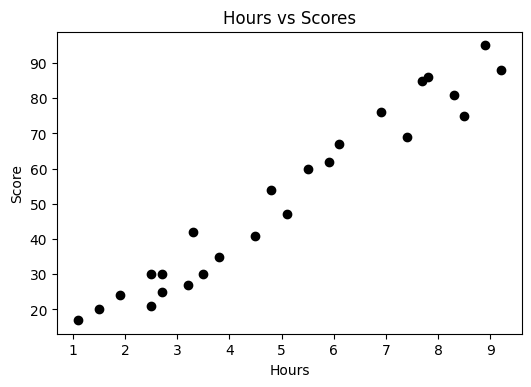

In [14]:
plt.rcParams["figure.dpi"] = 100
plt.scatter(df["Hours"], df["Scores"], color="black")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [9]:
import numpy as np

data_x = np.array(list(df["Hours"])).reshape(-1,1)
data_y = np.array(list(df["Scores"])).reshape(-1,1)

## Divisão dos dados

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_x, data_y, test_size=0.2)


In [45]:
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 20
Teste: 5


## Criação do Modelo

In [46]:
from sklearn import linear_model

In [47]:
modelo = linear_model.LinearRegression()
modelo.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Coeficiente: ", modelo.coef_)

Coeficiente:  [[9.98858863]]


## Predições

In [49]:
y_predicao = modelo.predict(x_teste)

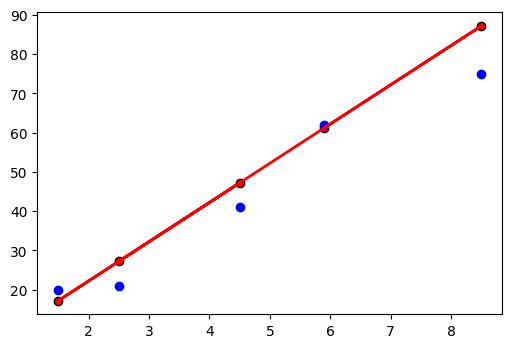

In [55]:
plt.scatter(x_teste, y_predicao, color="red", edgecolors="black")
plt.scatter(x_teste, y_teste, color="blue")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()

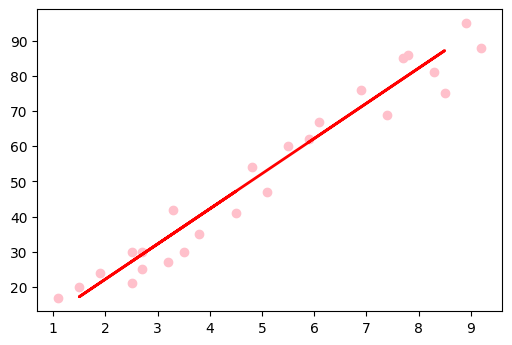

In [57]:
plt.scatter(df["Hours"], df["Scores"], color="pink")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()


## Métricas de Avaliação

In [62]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(y_teste, y_predicao)


In [66]:
print("MSE: ", mse)

MSE:  46.70089439483826


MSE = 0, Overfitting(viciado)

MSE = muito alto, Underfitting(fraco)

## Predição do Usuario


In [67]:
pergunta = np.array([6,8]).reshape(-1,1)
resposta = modelo.predict(pergunta)
print(pergunta)
print(resposta)

[[6]
 [8]]
[[62.18995799]
 [82.16713525]]


In [70]:
for i in range(2):
  print(f" {pergunta[i][0]} horas estudadas, terá uma nota {resposta[i][0]}")

 6 horas estudadas, terá uma nota 62.18995799292164
 8 horas estudadas, terá uma nota 82.16713524956174
